## Label three qubit blocks
### The goal is to uniquely identify/label the blocks in a larger circuit

In [14]:
import numpy as np
from qiskit import *
from qiskit.transpiler import PassManager, preset_passmanagers
from qiskit.transpiler.passes.optimization import TemplateOptimization, Collect2qBlocks, CollectMultiQBlocks
from qiskit.transpiler.passes.optimization.template_matching import *
from qiskit.converters import circuit_to_dag, circuit_to_dagdependency, dagdependency_to_circuit, dagdependency_to_dag
from qiskit.visualization import dag_drawer
from qiskit.quantum_info import Operator
import os
from qiskit import QuantumCircuit
from CollectNqBlocks import CollectNqBlocks


## Example circ

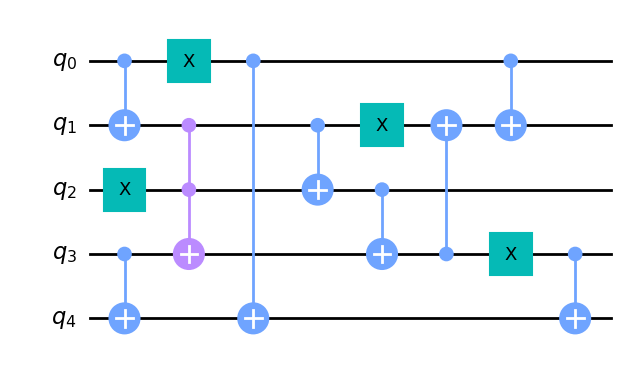

In [15]:
circ = QuantumCircuit(5)

circ.cx(0, 1)
circ.x(2)
circ.cx(3, 4)

circ.x(0)
circ.ccx(1, 2, 3)

circ.cx(0, 4)

circ.cx(1, 2)

circ.x(1)
circ.cx(2, 3)

circ.cx(3, 1)

circ.cx(0, 1)
circ.x(3)

circ.cx(3, 4)
circ.draw('mpl')

## Collect blocks

In [16]:
dag = circuit_to_dag(circ)

new_blocks = CollectNqBlocks(dag, 3)

for x in new_blocks:
    display(x)

[DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1)), cargs=()),
 DAGOpNode(op=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 0),), cargs=()),
 DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 4)), cargs=())]

[DAGOpNode(op=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 2),), cargs=()),
 DAGOpNode(op=Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3)), cargs=()),
 DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2)), cargs=()),
 DAGOpNode(op=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 1),), cargs=()),
 DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3)), cargs=()),
 DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 1)), cargs=()),
 DAGOpNode(op=Instruction(name='x', nu